In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [43]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer 
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from subprocess import check_output
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [39]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [40]:
from textblob.classifiers import NaiveBayesClassifier

In [41]:
from sklearn.neural_network import MLPClassifier

In [7]:
emean = pd.read_csv("tweet-emot.csv",encoding='latin1')
emean.sample(10)

,tweet_id,sentiment,author,content
37802,1753549664,fun,sineadgleeson,@forkncork I'll be thinking about how many goa...
35303,1753074039,worry,xxcassidyxx,Well then andy i dont think you should date me
20630,1694072399,neutral,xiape,@Dutchrudder I told 'em that the English have ...
37785,1753548959,neutral,norme,@laura_diaz I did notice more men with kids in...
9841,1962725080,love,osulax19,i love my new phone but hate that i didnt get ...
26133,1695310782,neutral,Somxlov3,graphic design..should be making a business ca...
1711,1957378535,hate,katiemul,This is exactly y I hate driving thru dandy - ...
15511,1964865618,hate,QueenFknBri,This day is fkn UGLY &amp; it matches my mood ...
2876,1957645950,happiness,libbyoliver,@caldjr yeh me 2
33419,1752593287,worry,mzellous,I'm baking cookies. What are YOU doing?


In [8]:
emean = emean[["content","sentiment"]]
emean.sample(10)

,content,sentiment
18182,another friday night with nothing to do ...boy...,sadness
35707,"@jen004 Nope, not &quot;done&quot; yet",happiness
956,I just got mad tired so no sex sleepytime night!,worry
32981,@humanabstract anything!,neutral
34480,I just received a mothers day card from my lov...,love
9729,Just lost respect to someone.,sadness
39087,Sleeeping ; just had to say Happy Momdukes Day,love
5580,I'm extremely hungry.... and the only thing I ...,worry
21603,"@savii313 I am twittering, LIKE A BOSS. Thanks...",relief
18742,Idk yet!!! @Jersey_Gyrl I wanna go soon tho......,neutral


In [9]:
emean.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [181]:
lem = WordNetLemmatizer()
def clean_it (text) :
    text = ' '.join([lem.lemmatize(w) for w in text.split()])
    text = re.sub(r"@[a-zA-Z_/d]*","",text)
    text = re.sub("n\'t"," not ",text)
    text = re.sub("\(.*?\)","",text)
    text = re.sub("\[.*?\]","",text)
    text = re.sub(r'\".*?\"',"",text)
    text = text.lower()
#     text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'\b\w*\d+\w*\b','',text)
    text = re.sub(r"\b[^\s][^\s]\b","",text)
    text = re.sub(r"\b[^\s]\b","",text)
#     text = re.sub("^\w$","",text)
    text = re.sub("\d+","",text)
#     text = re.sub("^/w/w$","",text)
#     text = re.sub("^.?$","",text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\á', ' ', text)
    text = re.sub(' +',' ',text)
    text = " ".join([ x for x in text.split() if x not in stopwords.words("english")])
    return text
clean = lambda x : clean_it(x) 

In [11]:
cleaned = emean.content.apply(clean)

In [12]:
cleaned

0          know   listenin  bad habit earlier and  star...
1        layin  bed with  headache ughhhh   waitin  you...
2                      funeral ceremony   gloomy friday   
3                         want  hang out with friend soon 
4          want  trade with someone who  houston ticket...
5         pinging   why did snot  you   prom     did sn...
6         should  sleep  but  not  thinking about  old ...
7                       hmmm  http   www djhero com   down
8                                charlene  love   miss you
9                                   sorry  least   friday 
10                                        cant fall asleep
11                                    choked  her retainer
12       ugh   have  beat this stupid song  get  the ne...
13          watch the hill  london  will realise what t...
14                                            got the news
15               the storm  here and the electricity  gone
16                                                  agre

In [13]:
set(stopwords.words("english"))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
custom_sw = list(set(stopwords.words("english")))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(cleaned,emean.sentiment,test_size = 0.2,random_state = 42)
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words= custom_sw)
X_train = vectorizer.fit_transform(X_train)

a = cleaned
tv = TfidfVectorizer()
a= tv.fit_transform(a)

# a.toarray()
print("\n")
for i in tv.get_feature_names() :
    if len(i) < 3:
        print(i)

In [16]:
vectorizer.vocabulary_

{'thundershowers': 140795,
 'plus': 106279,
 'baseball': 10701,
 'equal': 40050,
 'awwww': 8789,
 'thundershowers plus': 140796,
 'plus baseball': 106282,
 'baseball equal': 10703,
 'equal awwww': 40053,
 'hangover': 59912,
 'movie': 91733,
 'gonna': 54642,
 'hilarious': 63290,
 'wish': 157293,
 'could': 27660,
 'see': 119842,
 'crew': 28873,
 'hangover movie': 59919,
 'movie gonna': 91788,
 'gonna hilarious': 54734,
 'hilarious wish': 63311,
 'wish could': 157342,
 'could see': 27847,
 'see crew': 119937,
 'playing': 105827,
 'game': 50622,
 'leave': 75802,
 'work': 158632,
 'til': 141087,
 'least': 75684,
 'tonight': 143628,
 'playing game': 105865,
 'game leave': 50671,
 'leave work': 75911,
 'work work': 159168,
 'work til': 159106,
 'til least': 141112,
 'least tonight': 75778,
 'stick': 131399,
 'till': 141160,
 'freakin': 48404,
 'madd': 83389,
 'suck': 133481,
 'worked': 159188,
 'day': 31094,
 'stick work': 131417,
 'work till': 159107,
 'till freakin': 141202,
 'freakin madd'

In [17]:
y_train

14307       neutral
17812           fun
11020         worry
15158          hate
24990      surprise
5980        sadness
30334       neutral
26175          love
11195           fun
20033     happiness
26847         worry
5838         relief
5485        sadness
22503     happiness
6897       surprise
35819       neutral
19126       sadness
25194          love
21023     happiness
17311       neutral
33262       neutral
36281          love
3662        sadness
36732         empty
30379    enthusiasm
31704      surprise
18403         worry
6311        sadness
25908       sadness
14208         worry
            ...    
31551       neutral
1267        sadness
1899       surprise
35773         empty
19118          hate
189        surprise
2747        sadness
18431     happiness
18942         worry
25658        relief
27480        relief
6396          worry
28693     happiness
19769       sadness
17568       sadness
39188       neutral
37819     happiness
5311        sadness
2433           hate


In [18]:
X_test = vectorizer.transform(X_test)

In [19]:
# X_test.toarray()

In [20]:
# y_test = vectorizer.transform(y_test)

In [55]:
model = LogisticRegression()
model.fit(X_train,y_train)

e:\test-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\test-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr_predictions = model.predict(X_test)

In [57]:
lr_predictions

array(['happiness', 'neutral', 'worry', ..., 'sadness', 'worry',
       'happiness'], dtype=object)

In [58]:
trial = ["hell hell hell hell !"]
pd.Series(trial).apply(clean)
a = vectorizer.transform(trial)
print(model.predict(a))
model.predict_proba(a)

['worry']


array([[0.00320073, 0.0134588 , 0.03016138, 0.02162893, 0.04266312,
        0.06840285, 0.11200583, 0.03280222, 0.10879822, 0.03806864,
        0.17134003, 0.0636168 , 0.29385246]])

In [25]:
accuracy_score(y_test,lr_predictions)

0.3455

In [26]:
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.50      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.04      0.00      0.01       338
   happiness       0.33      0.37      0.35      1028
        hate       0.53      0.16      0.24       268
        love       0.48      0.38      0.43       762
     neutral       0.34      0.51      0.41      1740
      relief       0.47      0.02      0.04       352
     sadness       0.34      0.23      0.28      1046
    surprise       0.50      0.04      0.07       425
       worry       0.32      0.54      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.30      0.17      0.17      8000
weighted avg       0.35      0.35      0.31      8000



e:\test-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
rf_predictions = model.predict(X_test)
accuracy_score(y_test,rf_predictions)

e:\test-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.30475

In [28]:
model = MultinomialNB()
model.fit(X_train,y_train)
nb_predictions = model.predict(X_test)
accuracy_score(y_test,nb_predictions)

0.295625

In [29]:
a = vectorizer.transform(["not happy"])
model.predict(a)

array(['love'], dtype='<U10')

In [54]:
import paralleldots
paralleldots.set_api_key("OSIaK6xqY82Dqz5uDAh6ZtAinGLrMjUDcDY7HDuPDFY")
# for single sentence
text="i was at walpurgis night"
response=paralleldots.emotion(text)
print(response)



{'emotion': {'Happy': 0.106007569, 'Angry': 0.0977317683, 'Fear': 0.1937723094, 'Bored': 0.2301683902, 'Sad': 0.1767945583, 'Excited': 0.1955254048}}


In [10]:

csv_list = []
char_name = []
dialogue= []
for j in range(1,9):
    for i in range(1,24): 
        try:
            text_file = open(f"S{j}/Season{j}{i}.txt", "r")
            l=(text_file.read())
            soup = BeautifulSoup(l)
            csv_list += ([p.get_text().split(':') for p in soup.findAll('p') if ':' in str(p)])
        except:
            continue
#   print(csv_list,'\n\n')
csv_list = [p for p in csv_list if len(p)==2]
# pprint(pd.Series(csv_list).apply(len)==3)
char_name += ([p[0] for p in csv_list])
dialogue += ([p[1] for p in csv_list])

In [2]:
frnds = pd.read_csv("frnds.csv")
frnds.columns

Index(['Char', 'Diag', 'wlen'], dtype='object')

In [3]:
frnds[frnds.Char == "Chandler"]

,Char,Diag,wlen
2,Chandler,"\nAll right Joey, be nice. \n\nSo does he ha...",16
5,Chandler,"Alright, so I'm back in high \n\nschool, I'm ...",22
6,Chandler,"Then I look down, and I realize \n\nthere's a...",11
7,Chandler,"All of a sudden, the phone \n\nstarts to ring...",21
8,Chandler,"Finally, I \n\nfigure I'd better answer it, a...",23
16,Chandler,Sometimes I wish I was a \n\nlesbian... (They...,18
20,Chandler,And I just want a million \n\ndollars! (He ex...,12
38,Chandler,"I'm sorry, I didn't catch your \n\nname. Paul...",10
49,Chandler,I \n\nwould have to say that is an 'L'-shaped...,10
56,Chandler,You must stop! \n\n(Chandler hits what he is ...,16


In [184]:
char = ["Ross","Rachel","Monica","Phoebe","Joey","Chandler"]

In [185]:
data = {k:"" for k in char}

In [186]:
print(data)

{'Ross': '', 'Rachel': '', 'Monica': '', 'Phoebe': '', 'Joey': '', 'Chandler': ''}


In [187]:
frnds.Char

0          Monica
1            Joey
2        Chandler
3          Phoebe
4          Monica
5        Chandler
6        Chandler
7        Chandler
8        Chandler
9            Ross
10         Monica
11         Phoebe
12           Ross
13           Ross
14           Ross
15           Ross
16       Chandler
17           Ross
18           Joey
19           Ross
20       Chandler
21         Rachel
22         Monica
23         Monica
24         Monica
25           Ross
26         Rachel
27         Rachel
28         Rachel
29         Monica
           ...   
13430        Joey
13431        Joey
13432    Chandler
13433        Joey
13434    Chandler
13435        Joey
13436    Chandler
13437    Chandler
13438    Chandler
13439        Joey
13440        Joey
13441      Rachel
13442        Ross
13443      Rachel
13444      Rachel
13445        Ross
13446      Rachel
13447        Ross
13448        Ross
13449      Rachel
13450      Rachel
13451        Ross
13452      Rachel
13453      Rachel
13454     

In [188]:
for k in data.keys() :
    for i in frnds[frnds.Char == k].Diag :
        data[k] += " "+clean_it(i)    

In [189]:
data["Ross"]

" feel like someone reached throat, grabbed small intestine, pulled mouth tied around neck... , ! stop cleansing aura! , leave aura alone, okay? fine, alright? really, everyone. hope she' happy. , hell her, left ! !! okay?! doe everyone keep fixating that? know, know? told mom dad last night, seemed take pretty well. want single, okay? just... just- wanna married again! whatever christine having. , ! paul wine guy! rachel, what' you, ... what' tonight? right, you' even getting honeymoon, god.. , , although, aruba, time year... talk your- -big lizards... anyway, feel like alone tonight, joey chandler coming help put together new furniture. supposed attach brackety thing side things, using bunch little worm guys. brackety thing, see whim guy whatsoever and- cannot feel legs. carol favorite beer. always drank can, known. know scariest part ? one woman everybody, know? mean get one woman- ? unfortunately case, one woman- her... grab spoon. know long since grabbed spoon? word 'billy, hero' 

In [193]:
from pprint import pprint
pprint(data.keys)

<built-in method keys of dict object at 0x000000001A4301B0>


In [237]:
all_diag = ""
for i in data.values() :
    all_diag += i

In [191]:
friends = pd.DataFrame({"Char" : list(data.keys()),"Diag" : list(data.values())})

In [192]:
friends[friends.Char == "Ross"]

,Char,Diag
0,Ross,"feel like someone reached throat, grabbed sma..."


In [146]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

friends['polarity'] = friends['Diag'].apply(pol)
friends['subjectivity'] = friends['Diag'].apply(sub)
friends

,Char,Diag,polarity,subjectivity
0,Ross,feel like someone reached throat grabbed smal...,0.133506,0.543613
1,Rachel,god monica thank god went building guy big ha...,0.116599,0.563913
2,Monica,nothing tell guy work okay everybody relax ev...,0.128495,0.557697
3,Phoebe,cause want went carl ooh helped doe mean sell...,0.140251,0.549873
4,Joey,mon going guy gotta something wrong alright r...,0.137051,0.528338
5,Chandler,right joey nice doe hump hump hairpiece alrig...,0.136395,0.535382


In [147]:
import math

def split_text(text, n=100):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [148]:
list_pieces = []
for t in friends.Diag:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces[5]

[' right joey nice doe hump hump hairpiece alright back high school standing middle cafeteria realize totally naked look realize phone sudden phone start ring know everybody start looking finally figure better answer turn mother weird never call sometimes wish lesbian say loud want million dollars sorry catch name paul would say shaped bracket must stop look ross gotta understand relationship lasted longer mento however love woman four years four year closeness sharing end ripped heart think point invade poland anything right kids gotta get work input numbers make much difference right sorry know listen closely hear thousand retailer scream make serving kids new dream las vegas yeah think kissing pretty much like opening act know mean like stand comedian sit pink floyd come problem though concert matter great show girl always looking comedian know mean car fighting traffic basically trying stay awake think episode three company kind misunderstanding would mine see wrote note realised n

In [149]:
print(len(list_pieces),len(list_pieces[0]))

6 100


In [150]:
import matplotlib.pyplot as plt

In [151]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17238653819298982,
  0.22845392702535558,
  0.03288591489811002,
  0.13911149825783972,
  0.09695578231292516,
  0.11029942279942279,
  0.1335858585858586,
  0.1760982388823298,
  0.17159090909090907,
  0.12689207344379763,
  0.2717985842985842,
  0.01822478991596638,
  0.2591954022988505,
  0.2521404521404522,
  -0.07269642857142856,
  -0.050529100529100514,
  0.17676567259900594,
  0.036030505952380956,
  0.16530337941628265,
  0.10850313479623823,
  0.07022118506493505,
  0.11923280423280423,
  -0.02316252587991718,
  0.2273088023088023,
  0.13350649350649352,
  0.1363275613275613,
  0.07506802721088437,
  0.061970899470899475,
  0.1315192743764172,
  0.077,
  0.15460662525879917,
  0.18948576675849405,
  0.13080808080808082,
  0.16916666666666666,
  0.286002886002886,
  0.1749615975422427,
  0.12081252081252082,
  0.07703634085213032,
  0.1617353041695147,
  0.1836309523809524,
  0.004800619434765787,
  0.1565367965367965,
  0.13399771524771525,
  0.03401360544217686,
  0.05422

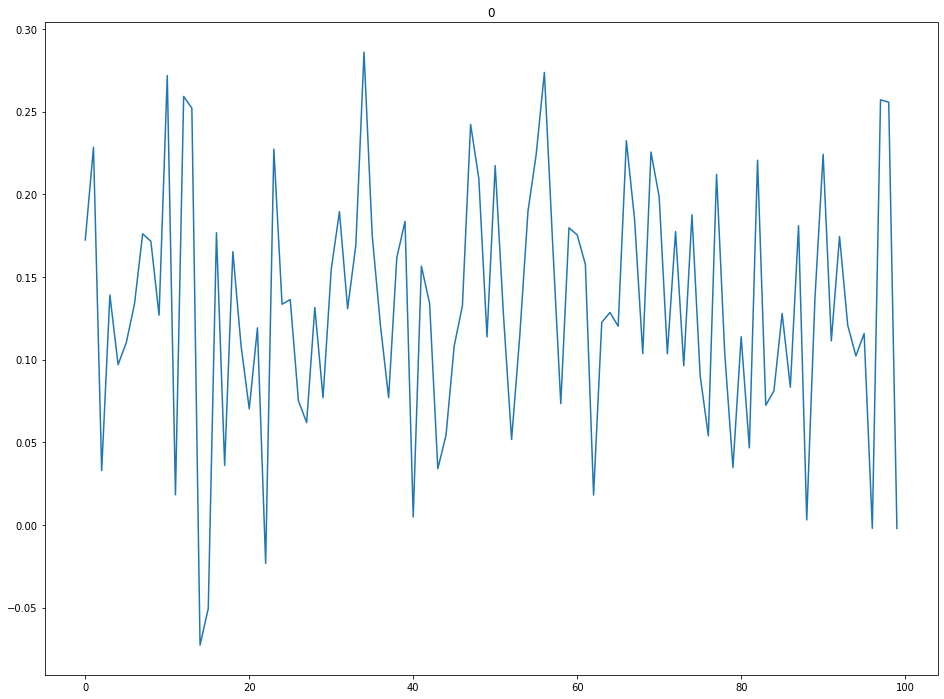

In [152]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(friends.Char.index[0])
plt.show()

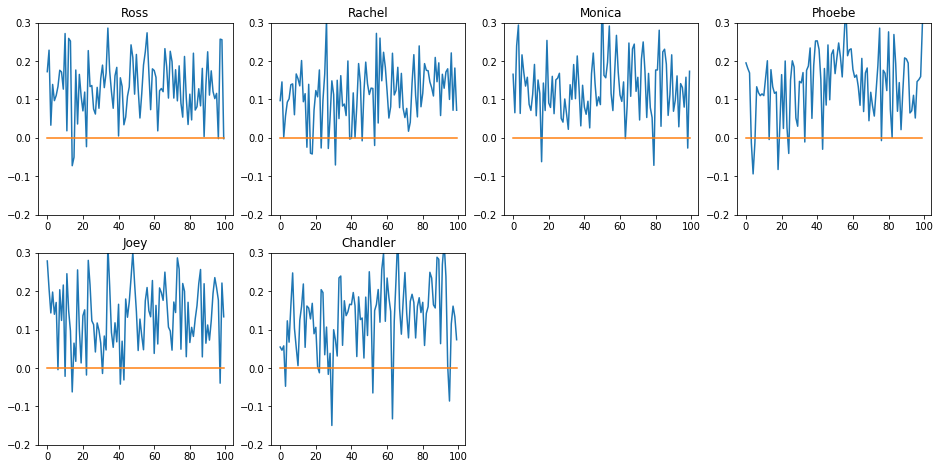

In [153]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(friends.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,100), np.zeros(100))
    plt.title(friends.Char[index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [154]:
# Calculate the polarity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.524824046920821,
  0.5599768089053803,
  0.5200348432055749,
  0.5319976771196284,
  0.5117176870748299,
  0.520021645021645,
  0.5579605579605578,
  0.5222804342122526,
  0.551567414067414,
  0.5252593670697119,
  0.6229622479622481,
  0.5986169467787114,
  0.5003010399562124,
  0.4746245524023302,
  0.5636785714285715,
  0.4996964455297788,
  0.5792394847950403,
  0.5441034226190478,
  0.41793394777265747,
  0.47173458725182865,
  0.5759977002164501,
  0.6572398589065256,
  0.5046152518978606,
  0.48170634920634914,
  0.427799938157081,
  0.5746103896103897,
  0.5119727891156461,
  0.5851791726791726,
  0.5401360544217687,
  0.3907777777777778,
  0.44818840579710156,
  0.5297979797979798,
  0.5456228956228957,
  0.5441666666666667,
  0.5562049062049061,
  0.6733166922683052,
  0.5715118215118216,
  0.6480889724310778,
  0.5179553998632944,
  0.5046378968253968,
  0.6368805652342239,
  0.5259030784030784,
  0.5135852573352574,
  0.4801941609977325,
  0.6522321428571429,
  0.585443

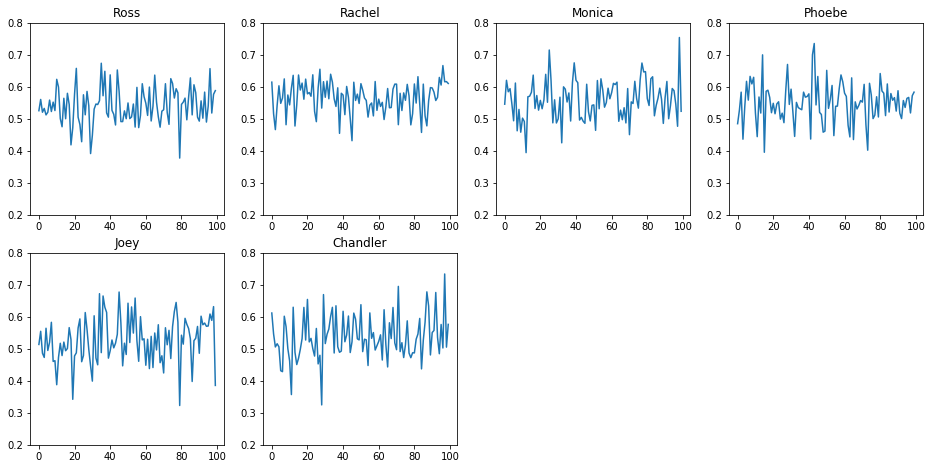

In [155]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(friends.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(friends.Char[index])
    plt.ylim(ymin=0.2, ymax=0.8)
    
plt.show()

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=0.1)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test,prediction)

NameError: name 'X_train' is not defined

In [227]:
test_text = ""
for i in friends.Char :
    test_text += friends[friends.Char == i].Diag

In [233]:
friends[friends.Char == friends.Char[1]].Diag[1]

' god monica ! thank god! went building guy big hammer said might are, are! daddy, just... marry him! sorry. love him. well, matter ! mon daddy, listen ! like, like, life, everyone always told , \'you\' shoe! you\' shoe, you\' shoe, you\' shoe!\'. today stopped said, \'what wanna shoe? wanna - purse, know? - hat! , saying want buy hat, saying - metaphor, daddy! look daddy, life. well maybe stay monica. well, maybe decision. well, maybe need money. wait!! wait, said maybe!! well, kinda supposed headed aruba honeymoon, nothing! well actually thanks, think gonna hang tonight. kinda long day. barry, sorry... sorry... know probably think said day making love sock , ... , , - , machine cut again... anyway...look, look, know girl going incredibly lucky become mrs. barry finkel, , . idea right now, give chance too... amazing? mean, never made coffee entire life. know, figure make coffee, anything . see that. look like slept hanger mouth. gonna get one job things. kidding? trained nothing! laug

In [224]:
friends.Char[0]

'Ross'

In [228]:
print(test_text)

0    NaN
Name: Diag, dtype: object


In [197]:
import gensim
from gensim.models import Word2Vec

In [159]:
test_text = nltk.word_tokenize(test_text)

In [169]:
a = " ".join(test_text)

In [178]:
print(a)

feel like someone reached throat grabbed small intestine pulled mouth tied around neck stop cleansing aura leave aura alone okay fine alright really everyone hope happy hell left okay doe everyone keep fixating know know told mom dad last night seemed take pretty well want single okay wan na married whatever christine paul wine guy rachel tonight right even getting honeymoon god although aruba time year talk big lizards anyway feel like alone tonight joey chandler coming help put together new furniture supposed attach brackety thing side things using bunch little worm guys brackety thing see whim guy whatsoever can not feel legs carol favorite beer always drank known know scariest part one woman everybody know mean get one woman unfortunately case one woman grab spoon know long since grabbed spoon word billy hero mean anything know thing even could get together enough ask woman gon na ask assume looking answer sophisticated get bed come made coffee anything mmm okay know probably know 

In [238]:
all_sentences = nltk.sent_tokenize(all_diag)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

In [239]:
all_words

[['feel',
  'like',
  'someone',
  'reached',
  'throat',
  ',',
  'grabbed',
  'small',
  'intestine',
  ',',
  'pulled',
  'mouth',
  'tied',
  'around',
  'neck',
  '...',
  ',',
  '!'],
 ['stop', 'cleansing', 'aura', '!'],
 [',', 'leave', 'aura', 'alone', ',', 'okay', '?'],
 ['fine', ',', 'alright', '?'],
 ['really', ',', 'everyone', '.'],
 ['hope', 'she', "'", 'happy', '.'],
 [',', 'hell', 'her', ',', 'left', '!'],
 ['!', '!'],
 ['okay', '?', '!'],
 ['doe', 'everyone', 'keep', 'fixating', 'that', '?'],
 ['know', ',', 'know', '?'],
 ['told',
  'mom',
  'dad',
  'last',
  'night',
  ',',
  'seemed',
  'take',
  'pretty',
  'well',
  '.'],
 ['want', 'single', ',', 'okay', '?'],
 ['just', '...', 'just-', 'wan', 'na', 'married', 'again', '!'],
 ['whatever', 'christine', 'having', '.'],
 [',', '!'],
 ['paul', 'wine', 'guy', '!'],
 ['rachel', ',', 'what', "'", 'you', ',', '...', 'what', "'", 'tonight', '?'],
 ['right',
  ',',
  'you',
  "'",
  'even',
  'getting',
  'honeymoon',
  ',',
 

In [240]:
model1 = gensim.models.Word2Vec(test_text, min_count = 1,  
                              size = 100, window = 5) 

TypeError: 'float' object is not iterable

In [107]:
model2 = gensim.models.Word2Vec(test_text) 

In [241]:
word2vec = Word2Vec(all_words, min_count = 1)  

In [243]:
vocabulary = word2vec.wv.vocab  
print(vocabulary.keys()) 

dict_keys(['feel', 'like', 'someone', 'reached', 'throat', ',', 'grabbed', 'small', 'intestine', 'pulled', 'mouth', 'tied', 'around', 'neck', '...', '!', 'stop', 'cleansing', 'aura', 'leave', 'alone', 'okay', '?', 'fine', 'alright', 'really', 'everyone', '.', 'hope', 'she', "'", 'happy', 'hell', 'her', 'left', 'doe', 'keep', 'fixating', 'that', 'know', 'told', 'mom', 'dad', 'last', 'night', 'seemed', 'take', 'pretty', 'well', 'want', 'single', 'just', 'just-', 'wan', 'na', 'married', 'again', 'whatever', 'christine', 'having', 'paul', 'wine', 'guy', 'rachel', 'what', 'you', 'tonight', 'right', 'even', 'getting', 'honeymoon', 'god..', 'although', 'aruba', 'time', 'year', 'talk', 'your-', '-big', 'lizards', 'anyway', 'joey', 'chandler', 'coming', 'help', 'put', 'together', 'new', 'furniture', 'supposed', 'attach', 'brackety', 'thing', 'side', 'things', 'using', 'bunch', 'little', 'worm', 'guys', 'see', 'whim', 'whatsoever', 'and-', 'can', 'not', 'legs', 'carol', 'favorite', 'beer', 'alwa

In [259]:
word2vec.wv.similarity('joey','sex')

0.9879007

In [ ]:
('.', 0.9999254941940308),
 ('little', 0.9999161958694458),
 ('...', 0.9999093413352966),
 ('like', 0.9999087452888489),
 ('well', 0.9999072551727295),
 ('one', 0.9999071359634399),
 ('want', 0.9999051094055176),
 ('say', 0.9999043345451355),
 ('said', 0.9999021291732788),
 ('would', 0.9999019503593445)]

In [211]:
print(sim_words)

[('would', 0.9993632435798645), ('away', 0.9993510246276855), ('?', 0.9993374347686768), ('!', 0.9993361830711365), ('joey', 0.9993357062339783), ('let', 0.9993273615837097), ('little', 0.999326765537262), ('give', 0.9993225336074829), ('umm', 0.9993224143981934), ('talk', 0.9993209838867188)]
